In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

/var/folders/c0/jb_297y53rz318rs5_1f22ph0000gn/T/ipykernel_42586/1165524131.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
admiss_core = pd.read_csv('../Data/AdmissionsCorePopulatedTable.txt', sep='\t', index_col='PatientID')
admiss_diag_core = pd.read_csv('../Data/AdmissionsDiagnosesCorePopulatedTable.txt', sep='\t', index_col='PatientID')
patient_core = pd.read_csv('../Data/PatientCorePopulatedTable.txt', sep='\t', index_col='PatientID')
labs_core = pd.read_csv('../Data/LabsCorePopulatedTable.txt', sep='\t', index_col='PatientID')

In [3]:
# 1) 
#admiss_core  #uses AdmissionStartDate and AdmissionEndDate
#patient_core #uses PatientDateOfBirth
labs_core    #uses LabDateTime
 


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [21]:
# Dates!

In [4]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#       

# Show the type
type('AdmissionStartDate')
  

str

In [5]:

# 1) 
# AdmissCore Conversion
admiss_core['AdmissionStartDate'] = pd.to_datetime(admiss_core['AdmissionStartDate'])
admiss_core['AdmissionEndDate'] = pd.to_datetime(admiss_core['AdmissionEndDate'])

#PatientCore Converstion
patient_core['PatientDateOfBirth'] = pd.to_datetime(patient_core['PatientDateOfBirth'])

#LabCore Conversion
labs_core['LabDateTime'] = pd.to_datetime(labs_core['LabDateTime'])


In [17]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [7]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	

#admiss_core
pid = '7A025E77-7832-4F53-B9A7-09A3F98AC17E'

admiss_core.loc[pid]

,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,1978-06-29 07:29:11.593,1978-07-10 04:05:51.787
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877
7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,2001-01-10 11:04:58.943,2001-01-27 00:54:18.730
7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,2001-12-29 20:28:01.050,2002-01-18 18:16:04.423


In [8]:
labs_core.loc[pid]


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [9]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [10]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [11]:
jdf.loc[pid]

,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,,,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...,...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [12]:
jdf

,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,,,,,,,
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08,1,URINALYSIS: RED BLOOD CELLS,3.1,rbc/hpf,1968-10-07 14:41:30.843
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08,1,METABOLIC: ALT/SGPT,57.1,U/L,1968-10-07 15:40:30.880
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08,1,METABOLIC: ANION GAP,14.6,mmol/L,1968-10-08 04:16:14.447
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08,1,METABOLIC: CALCIUM,10.4,mg/dL,1968-10-07 21:10:29.723
FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08,1,METABOLIC: CREATININE,0.9,mg/dL,1968-10-07 18:27:30.510
...,...,...,...,...,...,...,...,...,...,...,...
FB909FAE-72DD-4F6F-9828-D92183DF185F,Male,1940-07-15 12:18:41.080,White,Single,Spanish,14.90,3,URINALYSIS: PH,5.0,no unit,2008-04-15 01:17:05.407
FB909FAE-72DD-4F6F-9828-D92183DF185F,Male,1940-07-15 12:18:41.080,White,Single,Spanish,14.90,3,CBC: RDW,11.7,%,2008-04-14 18:31:19.077
FB909FAE-72DD-4F6F-9828-D92183DF185F,Male,1940-07-15 12:18:41.080,White,Single,Spanish,14.90,3,CBC: EOSINOPHILS,0.3,k/cumm,2008-04-14 21:47:11.293


In [13]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
jdf.groupby('PatientID').size().mean()
jdf.groupby('PatientID').size().std()


print("Stats on Number of Labs per Patient")
print("Mean:",jdf.groupby('PatientID').size().mean(),", Standard Deviation:",jdf.groupby('PatientID').size().std())

#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    
print("Number of each lab")
print(jdf.groupby('LabName').size())

Stats on Number of Labs per Patient
Mean: 1114.83 , Standard Deviation: 539.3615203144914
Number of each lab
LabName
CBC: ABSOLUTE LYMPHOCYTES        3162
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: BASOPHILS                   3165
CBC: EOSINOPHILS                 3191
CBC: HEMATOCRIT                  3211
CBC: HEMOGLOBIN                  3193
CBC: LYMPHOCYTES                 3162
CBC: MCH                         3191
CBC: MCHC                        3202
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC: MONOCYTES                   3129
CBC: NEUTROPHILS                 3224
CBC: PLATELET COUNT              3177
CBC: RDW                         3188
CBC: RED BLOOD CELL COUNT        3174
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: ALBUMIN               3202
METABOLIC: ALK PHOS              3154
METABOLIC: ALT/SGPT              3155
METABOLIC: ANION GAP             3166
METABOLIC: AST/SGOT              3179
METABOLIC: BILI TOTAL            3182
METABOLIC: BUN                   3158
METABOLIC

In [14]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken

jdf.groupby(['PatientID','LabName']).size().sort_values()


#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns



PatientID                             LabName                     
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  URINALYSIS: SPECIFIC GRAVITY     1
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  CBC: LYMPHOCYTES                 1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  CBC: HEMATOCRIT                  1
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  METABOLIC: SODIUM                1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  METABOLIC: ALBUMIN               2
                                                                      ..
80D356B4-F974-441F-A5F2-F95986D119A2  CBC: HEMOGLOBIN                 83
                                      CBC: PLATELET COUNT             84
                                      METABOLIC: ALT/SGPT             84
                                      METABOLIC: POTASSIUM            84
                                      CBC: HEMATOCRIT                 88
Length: 3499, dtype: int64

In [ ]:
# 1) 
#deleted to do my own work


In [15]:
thebusypatient = '80D356B4-F974-441F-A5F2-F95986D119A2' # put patient ID here
thebusylab = 'CBC: HEMATOCRIT' #put the lab name here
subdf = jdf.loc[(jdf.index==thebusypatient) & (jdf.LabName.str.startswith(thebusylab))]

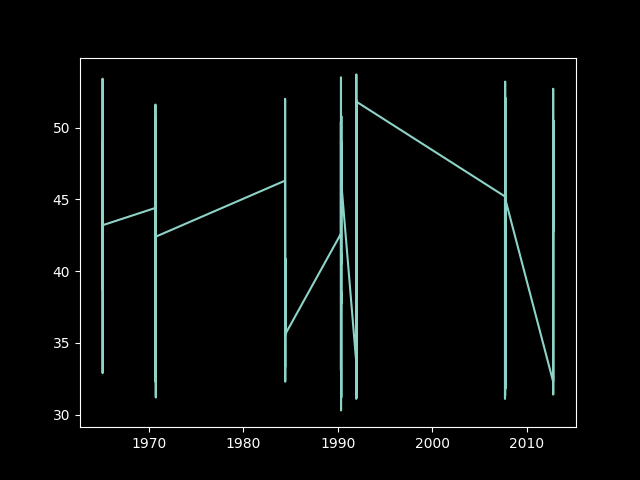

In [16]:
# 2) 
%matplotlib widget
dts = subdf['LabDateTime']  #date time
vls = subdf['LabValue']  #lab value

plt.figure()
plt.plot(dts, vls)



In [266]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?

#Based on this plot there is no data available for August 6, 1985. This could be due to several reason but most likley the patient did not have a lab visit on that day. 


# 2) How about the value for December 14, 1991?
#Based on this plot there is no data availabe for December 14, 1991.